In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pl = pd.read_csv('data/planets.csv')
pl.head()

,period,name,eccentricity,description,discoverymethod,periastrontime,lastupdate,semimajoraxis,mass,periastron,list,discoveryyear
0,326.03,11 Com b,0.231,11 Com b is a brown dwarf-mass companion to th...,RV,2452899.60,15/09/20,1.290,19.400,94.800,Confirmed planets,2008.0
1,516.22,11 UMi b,0.080,11 Ursae Minoris is a star located in the cons...,RV,2452861.04,15/09/20,1.540,11.200,117.630,Confirmed planets,2009.0
2,185.84,14 And b,0.000,14 Andromedae is an evolved star in the conste...,RV,2452861.40,15/09/20,0.830,4.800,0.000,Confirmed planets,2008.0
3,1766.00,14 Her b,0.359,The star 14 Herculis is only 59 light years aw...,RV,NaN,15/09/21,2.864,4.975,22.230,Confirmed planets,2002.0
4,9886.00,14 Her c,0.184,14 Her c is the second companion in the system...,RV,NaN,15/09/21,9.037,7.679,189.076,Controversial,2006.0


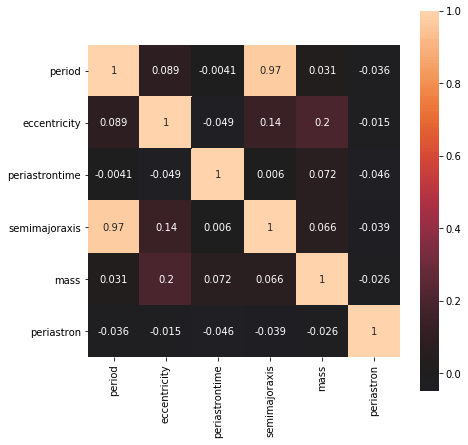

In [8]:
fig = plt.figure(figsize=(7,7))

sns.heatmap(
    pl.drop(columns=['discoveryyear']).corr(),
    annot=True, square= True, center = 0
)

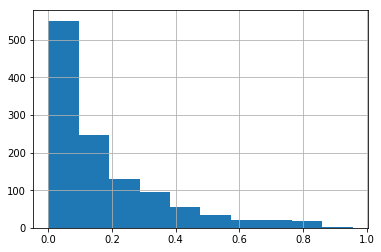

In [10]:
pl.eccentricity.hist()

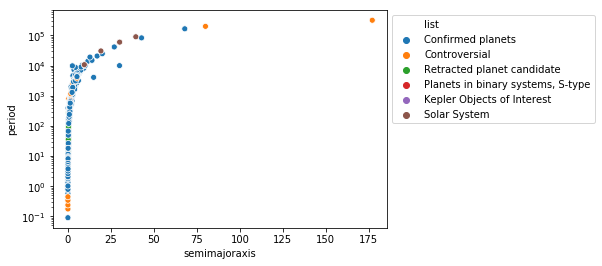

In [19]:
ax =sns.scatterplot(
    pl.semimajoraxis, pl.period, hue = pl.list
)
ax.legend(bbox_to_anchor=(1,1))
ax.set_yscale('log')

In [23]:
in_solar_system = (pl.list =='Solar System').rename('in solar system?')

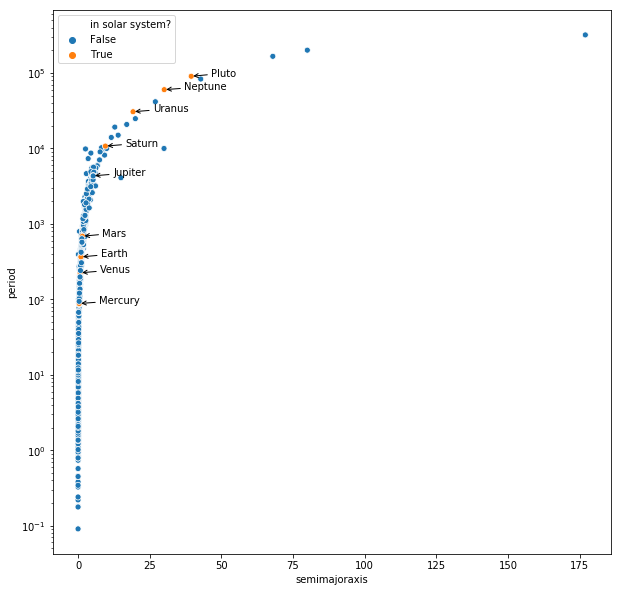

In [28]:
fig, axes = plt.subplots(1,1, figsize=(10,10))

ax = sns.scatterplot(
    pl.semimajoraxis, pl.period, hue=in_solar_system, ax = axes
)
ax.set_yscale('log')

solar_system = pl[pl.list =='Solar System']

for planet in solar_system.name:
    data = solar_system.query(f'name == "{planet}"')
    ax.annotate(
        planet,
        (data.semimajoraxis, data.period),
        (7 + data.semimajoraxis, data.period),
        arrowprops= dict(arrowstyle='->')
    )